# Flfl and Pp4r2 Analysis

- This notebook visualizes the data from the _Falafel[795]_ mutant live cell data. 
- These values were manually anotated from Imaris and normalization/calculations were done in excel.
    - The background pixel value was 100 for both channels, and normalization against the cytoplasm was done with a value of 150 for cytoplasmic RFP intensity.
    - This was done because the RFP signal is statistically similar across cells, so a base value of 150 for all cells made for easier quantification.
    - The AC/BC ratio is done using values after background subtraction.
- These values are then plotted using `seaborn` `stripplots` and `boxplots`.
- Statistical tests are done and recorded in a summary table at the end of the notebook.  

In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey
# ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'] #blue, purple, magenta, orange, and yellow palette for color blindness

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/SuppFig2'

In [3]:
ls

SuppFig2 data.xlsx  SuppFig2.ipynb      readme.md


In [4]:
home_dir = '/Users/rcsegura/Desktop/PP4_github/SuppFig2' # home directory
#figs_dir = home_dir + '/figs/' # directory to hold the figure output
#data_dir = home_dir + '/data/' # directory holding the data
#outs_dir = home_dir + '/output/' # directory to save any output csv files to 

In [5]:
# reading in data
#os.chdir(data_dir)
data = pd.read_excel('SuppFig2 data.xlsx', sheet_name = 'SuppFig 1C, 1D')
data.head(5)

,file name,genotype,phase,AC RFP mean,BC RFP mean,AC RFP norm,BC RFP norm,AC/BC
0,"Flfl795_3_pos1-4 WT, pos5-8 Flfl795 - Position 1",WT,interphase,947.675,376.914,5.651167,1.846093,3.515319
1,"Flfl795_3_pos1-4 WT, pos5-8 Flfl795 - Position 1",WT,interphase,991.105,513.405,5.940700,2.756033,2.314511
2,"Flfl795_3_pos1-4 WT, pos5-8 Flfl795 - Position 1",WT,interphase,1006.840,611.579,6.045600,3.410527,1.856324
3,"Flfl795_3_pos1-4 WT, pos5-8 Flfl795 - Position 1",WT,interphase,756.283,428.459,4.375220,2.189727,2.177279
4,"Flfl795_3_pos1-4 WT, pos5-8 Flfl795 - Position 1",WT,interphase,869.279,500.579,5.128527,2.670527,2.051689


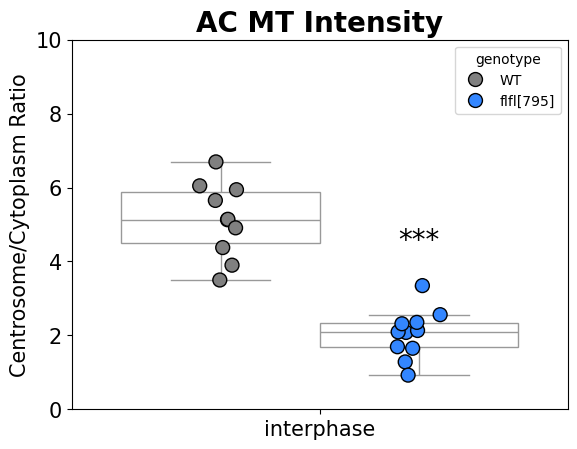

In [6]:
# plotting
o = ['interphase']
ho = ['WT', 'flfl[795]']
p = ['grey', '#3386FF']

sns.stripplot(x = 'phase', y = 'AC RFP norm', data = data,
             hue = 'genotype', hue_order = ho, order = o, palette = p,
             dodge = True, legend = True,
             linewidth = 1, edgecolor = 'k', size = 10);

sns.boxplot(x = 'phase', y = 'AC RFP norm', data = data,
             hue = 'genotype', hue_order = ho, order = o, palette = ['w', 'w'],
             dodge = True, legend = False);

# stat time, interphase
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC RFP norm']
param2 = data[(data['genotype']=='flfl[795]') & (data['phase']=='interphase')]['AC RFP norm']
int_p = independent_ttest(param1, param2, 0.05)[3]

if int_p < 0.001:
    plt.annotate('***', fontsize = 20, ha = 'center', xy = (0.2, param2.max()+1))
elif int_p < 0.01:
    plt.annotate('**', fontsize = 20, ha = 'center', xy = (0.2, param2.max()+1))
elif int_p < 0.05:
    plt.annotate('*', fontsize = 20, ha = 'center', xy = (0.2, param2.max()+1))
elif int_p > 0.05:
    plt.annotate(f"ns, p = {int_p}", fontsize = 10, ha = 'center', xy = (0.2, param2.max()+1))

# stat time, prometaphase
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC RFP norm']
param2 = data[(data['genotype']=='flfl[795]') & (data['phase']=='prometaphase')]['AC RFP norm']
int_p = independent_ttest(param1, param2, 0.05)[3]

if int_p < 0.001:
    plt.annotate('***', fontsize = 20, ha = 'center', xy = (1.2, param2.max()+1))
elif int_p < 0.01:
    plt.annotate('**', fontsize = 20, ha = 'center', xy = (1.2, param2.max()+1))
elif int_p < 0.05:
    plt.annotate('*', fontsize = 20, ha = 'center', xy = (1.2, param2.max()+1))
elif int_p > 0.05:
    plt.annotate(f"ns, p = {int_p}", fontsize = 10, ha = 'center', xy = (1.2, param2.max()+1))

# axis labels

plt.xlabel('')
plt.ylabel('Centrosome/Cytoplasm Ratio', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('AC MT Intensity', fontweight = 'bold', fontsize = 20)
plt.ylim(0,10)

#os.chdir(figs_dir)

#plt.savefig('AC intensity.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

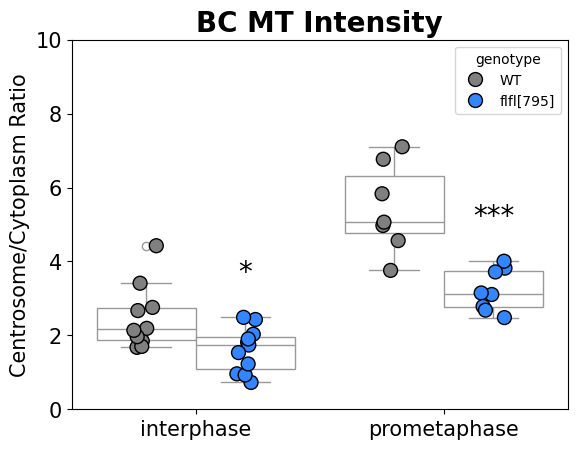

In [7]:
# plotting
o = ['interphase', 'prometaphase']
ho = ['WT', 'flfl[795]']
p = ['grey', '#3386FF']

sns.stripplot(x = 'phase', y = 'BC RFP norm', data = data,
             hue = 'genotype', hue_order = ho, order = o, palette = p,
             dodge = True, legend = True,
             linewidth = 1, edgecolor = 'k', size = 10);

sns.boxplot(x = 'phase', y = 'BC RFP norm', data = data,
             hue = 'genotype', hue_order = ho, order = o, palette = ['w', 'w'],
             dodge = True, legend = False);

# stat time, interphase
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['BC RFP norm']
param2 = data[(data['genotype']=='flfl[795]') & (data['phase']=='interphase')]['BC RFP norm']
int_p = independent_ttest(param1, param2, 0.05)[3]

if int_p < 0.001:
    plt.annotate('***', fontsize = 20, ha = 'center', xy = (0.2, param2.max()+1))
elif int_p < 0.01:
    plt.annotate('**', fontsize = 20, ha = 'center', xy = (0.2, param2.max()+1))
elif int_p < 0.05:
    plt.annotate('*', fontsize = 20, ha = 'center', xy = (0.2, param2.max()+1))
elif int_p > 0.05:
    plt.annotate(f"ns, p = {int_p}", fontsize = 10, ha = 'center', xy = (0.2, param2.max()+1))

# stat time, prometaphase
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['BC RFP norm']
param2 = data[(data['genotype']=='flfl[795]') & (data['phase']=='prometaphase')]['BC RFP norm']
int_p = independent_ttest(param1, param2, 0.05)[3]

if int_p < 0.001:
    plt.annotate('***', fontsize = 20, ha = 'center', xy = (1.2, param2.max()+1))
elif int_p < 0.01:
    plt.annotate('**', fontsize = 20, ha = 'center', xy = (1.2, param2.max()+1))
elif int_p < 0.05:
    plt.annotate('*', fontsize = 20, ha = 'center', xy = (1.2, param2.max()+1))
elif int_p > 0.05:
    plt.annotate(f"ns, p = {int_p}", fontsize = 10, ha = 'center', xy = (1.2, param2.max()+1))

# axis labels

plt.xlabel('')
plt.ylabel('Centrosome/Cytoplasm Ratio', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('BC MT Intensity', fontweight = 'bold', fontsize = 20)
plt.ylim(0,10)

#os.chdir(figs_dir)
#plt.savefig('BC intensity.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

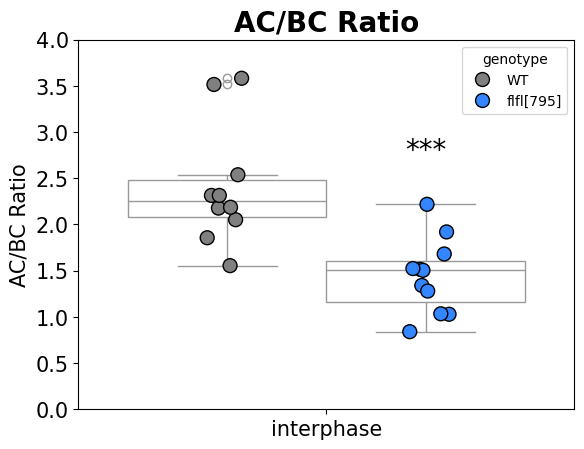

In [8]:
# plotting
o = ['interphase']
ho = ['WT', 'flfl[795]']
p = ['grey', '#3386FF']

sns.stripplot(x = 'phase', y = 'AC/BC', data = data,
             hue = 'genotype', hue_order = ho, order = o, palette = p,
             dodge = True, legend = True,
             linewidth = 1, edgecolor = 'k', size = 10);

sns.boxplot(x = 'phase', y = 'AC/BC', data = data,
             hue = 'genotype', hue_order = ho, order = o, palette = ['w', 'w'],
             dodge = True, legend = False);

# stat time, interphase
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/BC']
param2 = data[(data['genotype']=='flfl[795]') & (data['phase']=='interphase')]['AC/BC']
int_p = independent_ttest(param1, param2, 0.05)[3]

if int_p < 0.001:
    plt.annotate('***', fontsize = 20, ha = 'center', xy = (0.2, param2.max()+0.5))
elif int_p < 0.01:
    plt.annotate('**', fontsize = 20, ha = 'center', xy = (0.2, param2.max()+0.5))
elif int_p < 0.05:
    plt.annotate('*', fontsize = 20, ha = 'center', xy = (0.2, param2.max()+0.5))
elif int_p > 0.05:
    plt.annotate(f"ns, p = {int_p}", fontsize = 10, ha = 'center', xy = (0.2, param2.max()+0.5))

# stat time, prometaphase
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/BC']
param2 = data[(data['genotype']=='flfl[795]') & (data['phase']=='prometaphase')]['AC/BC']
int_p = independent_ttest(param1, param2, 0.05)[3]

if int_p < 0.001:
    plt.annotate('***', fontsize = 20, ha = 'center', xy = (1.2, param2.max()+0.5))
elif int_p < 0.01:
    plt.annotate('**', fontsize = 20, ha = 'center', xy = (1.2, param2.max()+0.5))
elif int_p < 0.05:
    plt.annotate('*', fontsize = 20, ha = 'center', xy = (1.2, param2.max()+0.5))
elif int_p > 0.05:
    plt.annotate(f"ns, p = {np.round(int_p, decimals = 3)}", fontsize = 10, ha = 'center', xy = (1.2, param2.max()+0.5))

# axis labels

plt.xlabel('')
plt.ylabel('AC/BC Ratio', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('AC/BC Ratio', fontweight = 'bold', fontsize = 20)
plt.ylim(0,4)

#os.chdir(figs_dir)
#plt.savefig('AC BC ratio.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

## Statistical Table

In [9]:
data.head(5)

,file name,genotype,phase,AC RFP mean,BC RFP mean,AC RFP norm,BC RFP norm,AC/BC
0,"Flfl795_3_pos1-4 WT, pos5-8 Flfl795 - Position 1",WT,interphase,947.675,376.914,5.651167,1.846093,3.515319
1,"Flfl795_3_pos1-4 WT, pos5-8 Flfl795 - Position 1",WT,interphase,991.105,513.405,5.940700,2.756033,2.314511
2,"Flfl795_3_pos1-4 WT, pos5-8 Flfl795 - Position 1",WT,interphase,1006.840,611.579,6.045600,3.410527,1.856324
3,"Flfl795_3_pos1-4 WT, pos5-8 Flfl795 - Position 1",WT,interphase,756.283,428.459,4.375220,2.189727,2.177279
4,"Flfl795_3_pos1-4 WT, pos5-8 Flfl795 - Position 1",WT,interphase,869.279,500.579,5.128527,2.670527,2.051689


In [10]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [11]:
# test# = [control genotype, experimental genotype, phase, y-value]
t1 = ['WT', 'flfl[795]', 'interphase', 'AC RFP norm']
t2 = ['WT', 'flfl[795]', 'interphase', 'AC/BC']

tests = [t1, t2]

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
# saves output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('FIG1 intensity stats.csv')
os.chdir(home_dir)

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,flfl[795],interphase,Unpaired Student's T-test,AC RFP norm,10,11,5.13E+00,2.04E+00,1.00E+00,6.52E-01,8.46E+00,19,N/A,7.18373e-08,****
1,WT,flfl[795],interphase,Unpaired Student's T-test,AC/BC,10,11,2.41E+00,1.44E+00,6.58E-01,4.05E-01,4.09E+00,19,N/A,6.23288e-04,***


In [13]:
# saves output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('Flfl[795] mutant stats.csv')
os.chdir(home_dir)

# Pp4r2 plots (SuppFig 1G, H)

In [14]:
# reading in the data
#os.chdir(data_dir)
data = pd.read_excel('SuppFig2 data.xlsx', sheet_name = 'SuppFig 1G, H')
data.head(5)

,file name,Nb,genotype,frame,phase,AC RFP,BC RFP,Cyto RFP,Unnamed: 8,AC RFP sub,BC RFP sub,Cyto RFP sub,AC/Cyto RFP,BC/Cyto RFP,AC/BC RFP
0,RCS PP4r2 RNAi_2024-03-26_F0_ANNOTATED,3.10E+01,"PP4r2 RNAi, 0X MTOC",1.00E+00,prometaphase,5.98E+02,5.85E+02,2.82E+02,NaN,4.98E+02,4.85E+02,1.82E+02,2.74E+00,2.66E+00,1.03E+00
1,NaN,3.10E+01,"PP4r2 RNAi, 0X MTOC",1.10E+01,interphase,1.98E+02,2.17E+02,1.97E+02,NaN,9.80E+01,1.17E+02,9.70E+01,1.01E+00,1.21E+00,8.38E-01
2,NaN,3.30E+01,"PP4r2 RNAi, 0X MTOC",3.00E+00,prometaphase,3.93E+02,3.25E+02,2.12E+02,NaN,2.93E+02,2.25E+02,1.12E+02,2.62E+00,2.01E+00,1.30E+00
3,NaN,3.30E+01,"PP4r2 RNAi, 0X MTOC",9.00E+00,interphase,1.97E+02,1.91E+02,1.91E+02,NaN,9.70E+01,9.10E+01,9.10E+01,1.07E+00,1.00E+00,1.07E+00
4,RCS PP4r2 RNAi_2024-03-26_F1_ANNOTATED,3.90E+01,"PP4r2 RNAi, 0X MTOC",1.00E+00,prometaphase,4.32E+02,5.54E+02,2.97E+02,NaN,3.32E+02,4.54E+02,1.97E+02,1.69E+00,2.30E+00,7.31E-01


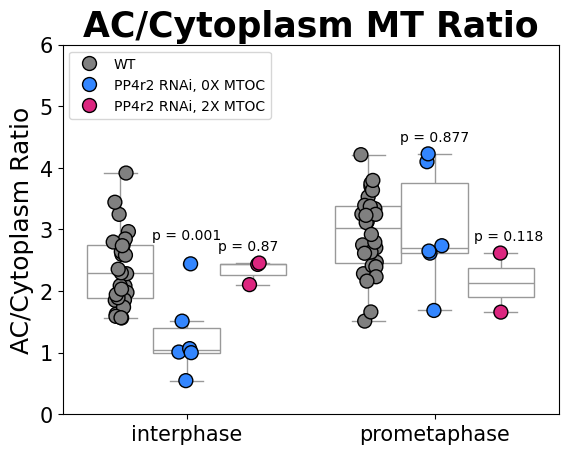

In [15]:
# plotting

p = ['grey', '#3386FF', '#DC267F']
point_size = 10
tick_size = 15
title_size = 25
axis_size = 18

sns.stripplot(data = data, x = 'phase', y = 'AC/Cyto RFP', hue = 'genotype',
             order = ['interphase', 'prometaphase'], hue_order = ['WT', 'PP4r2 RNAi, 0X MTOC', 'PP4r2 RNAi, 2X MTOC'],
             size = point_size, edgecolor = 'k', linewidth = 1, palette = p,
              dodge = True, legend = True)

sns.boxplot(data = data, x = 'phase', y = 'AC/Cyto RFP', hue = 'genotype',
             order = ['interphase', 'prometaphase'], hue_order = ['WT', 'PP4r2 RNAi, 0X MTOC', 'PP4r2 RNAi, 2X MTOC'],
             palette = ['w','w','w'],
              dodge = True, legend = False)

plt.ylim(0,6)
plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.title('AC/Cytoplasm MT Ratio', fontsize = title_size, fontweight = 'bold')
plt.ylabel('AC/Cytoplasm Ratio', fontsize = axis_size)
plt.xlabel('')

# stats, interphase WT vs 0X
param1 = data[(data['phase']=='interphase') & (data['genotype']=='WT')]['AC/Cyto RFP']
param2 = data[(data['phase']=='interphase') & (data['genotype']=='PP4r2 RNAi, 0X MTOC')]['AC/Cyto RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0, param2.max()+0.4), ha = 'center')

# stats, interphase WT vs 2X
param1 = data[(data['phase']=='interphase') & (data['genotype']=='WT')]['AC/Cyto RFP']
param2 = data[(data['phase']=='interphase') & (data['genotype']=='PP4r2 RNAi, 2X MTOC')]['AC/Cyto RFP']
b = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {b}", xy = (0.25, param2.max()+0.2), ha = 'center')

# stats, prometa WT vs 0X
param1 = data[(data['phase']=='prometaphase') & (data['genotype']=='WT')]['AC/Cyto RFP'].dropna()
param2 = data[(data['phase']=='prometaphase') & (data['genotype']=='PP4r2 RNAi, 0X MTOC')]['AC/Cyto RFP'].dropna()
c = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {c}", xy = (1, param2.max()+0.2), ha = 'center')

# stats, prometa WT vs 2X
param1 = data[(data['phase']=='prometaphase') & (data['genotype']=='WT')]['AC/Cyto RFP'].dropna()
param2 = data[(data['phase']=='prometaphase') & (data['genotype']=='PP4r2 RNAi, 2X MTOC')]['AC/Cyto RFP'].dropna()
d = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {d}", xy = (1.3, param2.max()+0.2), ha = 'center')

plt.legend(loc = 'upper left')

#os.chdir(figs_dir)

#plt.savefig('pp4r2_rnai_plot.svg', dpi = 900, bbox_inches = 'tight')
#plt.savefig('pp4r2_rnai_plot.png', dpi = 900, bbox_inches = 'tight')
plt.show();

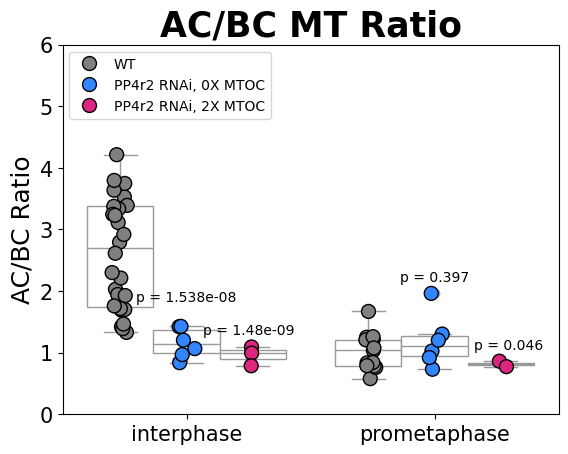

In [16]:
# plotting

p = ['grey', '#3386FF', '#DC267F']
point_size = 10
tick_size = 15
title_size = 25
axis_size = 18

sns.stripplot(data = data, x = 'phase', y = 'AC/BC RFP', hue = 'genotype',
             order = ['interphase', 'prometaphase'], hue_order = ['WT', 'PP4r2 RNAi, 0X MTOC', 'PP4r2 RNAi, 2X MTOC'],
             size = point_size, edgecolor = 'k', linewidth = 1, palette = p,
              dodge = True, legend = True)

sns.boxplot(data = data, x = 'phase', y = 'AC/BC RFP', hue = 'genotype',
             order = ['interphase', 'prometaphase'], hue_order = ['WT', 'PP4r2 RNAi, 0X MTOC', 'PP4r2 RNAi, 2X MTOC'],
             palette = ['w','w','w'],
              dodge = True, legend = False)

plt.ylim(0,6)
plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.title('AC/BC MT Ratio', fontsize = title_size, fontweight = 'bold')
plt.ylabel('AC/BC Ratio', fontsize = axis_size)
plt.xlabel('')

# stats, interphase WT vs 0X
param1 = data[(data['phase']=='interphase') & (data['genotype']=='WT')]['AC/BC RFP']
param2 = data[(data['phase']=='interphase') & (data['genotype']=='PP4r2 RNAi, 0X MTOC')]['AC/BC RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 11)
plt.annotate(f"p = {a}", xy = (0, param2.max()+0.4), ha = 'center')

# stats, interphase WT vs 2X
param1 = data[(data['phase']=='interphase') & (data['genotype']=='WT')]['AC/BC RFP']
param2 = data[(data['phase']=='interphase') & (data['genotype']=='PP4r2 RNAi, 2X MTOC')]['AC/BC RFP']
b = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 11)
plt.annotate(f"p = {b}", xy = (0.25, param2.max()+0.2), ha = 'center')

# stats, prometa WT vs 0X
param1 = data[(data['phase']=='prometaphase') & (data['genotype']=='WT')]['AC/BC RFP'].dropna()
param2 = data[(data['phase']=='prometaphase') & (data['genotype']=='PP4r2 RNAi, 0X MTOC')]['AC/BC RFP'].dropna()
c = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {c}", xy = (1, param2.max()+0.2), ha = 'center')

# stats, prometa WT vs 2X
param1 = data[(data['phase']=='prometaphase') & (data['genotype']=='WT')]['AC/BC RFP'].dropna()
param2 = data[(data['phase']=='prometaphase') & (data['genotype']=='PP4r2 RNAi, 2X MTOC')]['AC/BC RFP'].dropna()
d = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {d}", xy = (1.3, param2.max()+0.2), ha = 'center')

plt.legend(loc = 'upper left')

#os.chdir(figs_dir)
#plt.savefig('pp4r2_rnai_plot_ac_bc.svg', dpi = 900, bbox_inches = 'tight')
#plt.savefig('pp4r2_rnai_plot_ac_bc.png', dpi = 900, bbox_inches = 'tight')
plt.show();

# SuppFig 1G, H stats table

In [17]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [18]:
# test# = [control genotype, experimental genotype, phase, y-value]
t1 = ['WT', 'PP4r2 RNAi, 0X MTOC', 'interphase', 'AC/Cyto RFP']
t2 = ['WT', 'PP4r2 RNAi, 2X MTOC', 'interphase', 'AC/Cyto RFP']
t3 = ['WT', 'PP4r2 RNAi, 0X MTOC', 'interphase', 'AC/BC RFP']
t4 = ['WT', 'PP4r2 RNAi, 2X MTOC', 'interphase', 'AC/BC RFP']

tests = [t1, t2, t3, t4]

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
# saves output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('Pp4r2 stats.csv')
os.chdir(home_dir)

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,"PP4r2 RNAi, 0X MTOC",interphase,Unpaired Student's T-test,AC/Cyto RFP,28,6,2.36E+00,1.26E+00,6.06E-01,6.54E-01,3.97E+00,32,N/A,3.86363e-04,***
1,WT,"PP4r2 RNAi, 2X MTOC",interphase,Unpaired Student's T-test,AC/Cyto RFP,28,3,2.36E+00,2.33E+00,6.06E-01,1.96E-01,7.47E-02,29,N/A,9.40964e-01,ns
2,WT,"PP4r2 RNAi, 0X MTOC",interphase,Mann-Whitney U Test,AC/BC RFP,28,6,2.63E+00,1.15E+00,8.99E-01,2.41E-01,1.63E+02,N/A,N/A,2.82548e-05,****
3,WT,"PP4r2 RNAi, 2X MTOC",interphase,Mann-Whitney U Test,AC/BC RFP,28,3,2.63E+00,9.58E-01,8.99E-01,1.56E-01,8.40E+01,N/A,N/A,4.44939e-04,***
